In [29]:
import numpy as np

In [4]:
from scipy.integrate import odeint

In [5]:
import matplotlib.pyplot as plt

In [60]:
import pylab

#### Lotka-Volterra equations:

The Lotka-Volterra equations are two coupled first-order nonlinear differential equations that are used to characterize the dynamics of biological systems in which a predator population(P) and a prey popuation(N) interact. The two populations develop over time according to these equations:

\begin{eqnarray} \dot{N} &= &N(\alpha-\beta P)\\ \dot{P} &= &P(\sigma N - \gamma) \end{eqnarray}

Assumptions of this simple form of the model are:

1. prey find ample food at all times
2. food supply of predators depends entirely on prey population
3. rate of change of population is proportional to its size
4. the environment does not change

In [84]:
def lotka_volterra(state, time):
    
    N = state[0]
    P = state[1]
    alpha = 0.1 # natural growth rate of prey in absence of predators
    beta = 0.1 # death rate per encounter of prey by predator
    sigma = 0.1 # related growth rate of predators
    gamma = 0.1 # natural death rate of predator in absence of prey
    
    dNdt = N * (alpha - (beta * P))
    
    dPdt = P * ((sigma * N) - gamma)
    
    return [dNdt, dPdt]

In [85]:
time = np.arange(0, 500, 2)

In [86]:
state_zero = [0.5, 0.5] # initial population of prey and predator respectively

In [87]:
state = odeint(lotka_volterra, state_zero, time)

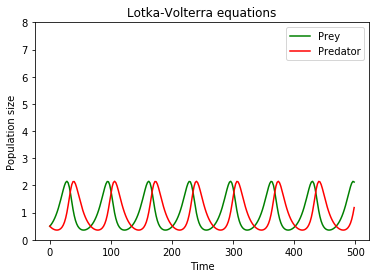

In [90]:
pylab.plot(time, state[:,0], '-g', label = 'Prey')
pylab.plot(time, state[:,1], '-r', label = 'Predator')
pylab.legend(loc = 'upper right')
pylab.ylim([0,8])
pylab.xlabel('Time')
pylab.ylabel('Population size')
pylab.title('Lotka-Volterra equations')
pylab.show()

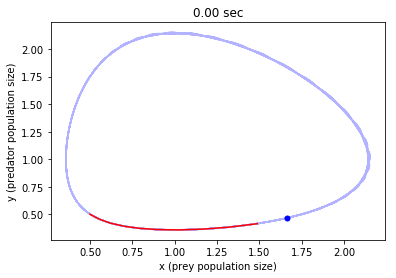

In [89]:
#state space model
plt.figure()
pb, = plt.plot(state[:,0],state[:,1],'b-',alpha=0.3)
plt.xlabel('x (prey population size)')
plt.ylabel('y (predator population size)')
p, = plt.plot(state[0:10,0],state[0:10,1],'r-')
pp, = plt.plot(state[10,0],state[10,1],'b.',markersize=10)
tt = plt.title("%4.2f sec" % 0.00)